# THE DEUTSCH-JOZSA ALGORITHM

We are going to use Qiskit to implement the Deutsch-Jozsa algorithm 

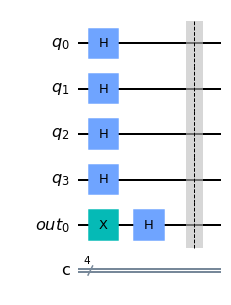

In [1]:
%matplotlib inline

from qiskit import *
from qiskit.visualization import *
from qiskit.tools.monitor import *

n = 4 # Number of qubits that we are going to use in the oracle

q   = QuantumRegister(n, 'q') # The oracle qubits
out = QuantumRegister(1, 'out') # Qubit for the oracle output
c   = ClassicalRegister(n, 'c') # Classical bits needed for the result of the measurement

circ_init = QuantumCircuit(q,out,c) # Initial part of the circuit

for i in range(n):    
    circ_init.h(q[i]) # We apply H to all the oracle qubits
    
circ_init.x(out)  # We apply X and H to the output qubit
circ_init.h(out)

circ_init.barrier() # Visual barrier to separate the parts of the circuit

circ_init.draw(output='mpl')

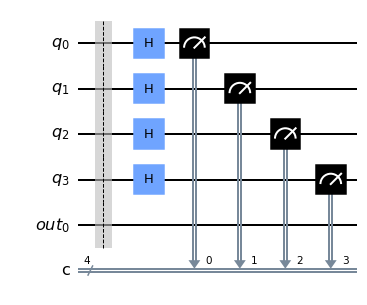

In [2]:
circ_end = QuantumCircuit(q,out,c)

circ_end.barrier() # Visual barrier to separate the parts of the circuit

for i in range(n):    
    circ_end.h(q[i]) # We apply H to all the oracle qubits
    
circ_end.measure(q,c)

circ_end.draw(output='mpl')

Now, we are going to define two oracles to check the behaviour of the algorithm. One will be a circuit for a constant function and the other, for a balanced function.

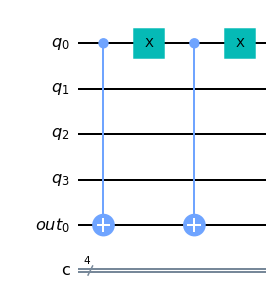

In [3]:
# Oracle for a boolean function that always returns 1 
    
const = QuantumCircuit(q,out,c)
const.cx(q[0],out)
const.x(q[0])
const.cx(q[0],out)
const.x(q[0])

const.draw(output='mpl')

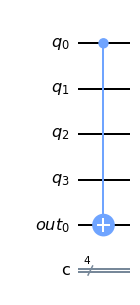

In [4]:
# Oracle for a boolean function that returns 1 for half of the inputs
    
bal = QuantumCircuit(q,out,c)
bal.cx(q[0],out)

bal.draw(output='mpl')

We create the circuit with the oracle for the constant function

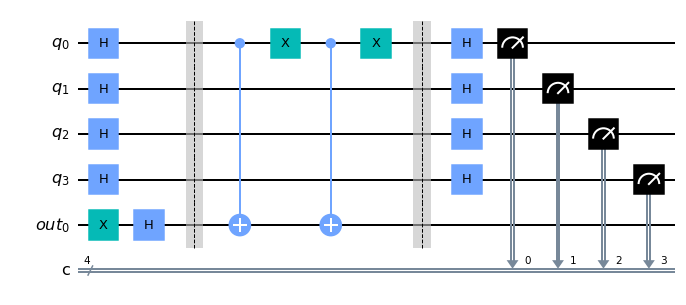

In [5]:
circ_const = circ_init + const + circ_end
circ_const.draw(output='mpl')

When we execute it, the result of the measure is, as expected, a string formed only by zeroes.

In [7]:
backend = Aer.get_backend('qasm_simulator')
job = execute(circ_const, backend, shots=100)
counts = job.result().get_counts()
print(counts)

{'0000': 100}


Finally, we build the circuit for the balanced function.

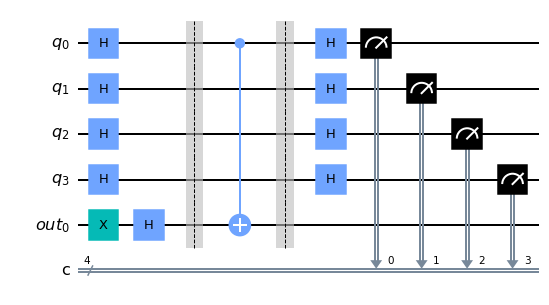

In [8]:
circ_bal = circ_init + bal + circ_end
circ_bal.draw(output='mpl')

When we run it, we always obtain a string that is not all zeroes.

In [10]:
job = execute(circ_bal, backend, shots=100)
counts = job.result().get_counts()
print(counts)

{'0001': 100}


We are now going to execute the circuit on a quantum computer

In [11]:
from qiskit.providers.ibmq import least_busy

provider = IBMQ.load_account()
# We choose the least busy device
backend = least_busy(provider.backends(operational = True, simulator=False, status_msg='active',
                                       filters=lambda x: x.configuration().n_qubits >= n+1)) 
print("We are using...",backend)
print("It has",backend.status().pending_jobs,"pending jobs")
# We send both circuits at a time
circuits = [circ_const,circ_bal]
job_exp = execute(circuits, backend=backend)
job_monitor(job_exp)

C:\Users\asus\Anaconda3\envs\cwq\lib\site-packages\qiskit\providers\ibmq\ibmqfactory.py:192: UserWarning: Timestamps in IBMQ backend properties, jobs, and job results are all now in local time instead of UTC.
  warnings.warn('Timestamps in IBMQ backend properties, jobs, and job results '


We are using... ibmq_athens
It has 54 pending jobs
Job Status: job has successfully run


Once the job is done, we obtain and show the results

In [12]:
result_exp = job_exp.result()
counts_const = result_exp.get_counts(circ_const)
print("Results for the circuit with the constant function")
print(counts_const)
print()
counts_equi = result_exp.get_counts(circ_bal)
print("Results for the circuit with the balanced function")
print(counts_equi)

Results for the circuit with the constant function
{'0000': 861, '0001': 22, '0010': 32, '0011': 13, '0100': 27, '0101': 4, '0110': 7, '0111': 3, '1000': 40, '1001': 4, '1010': 1, '1100': 10}

Results for the circuit with the balanced function
{'0000': 54, '0001': 862, '0010': 8, '0011': 22, '0100': 2, '0101': 21, '0110': 1, '0111': 6, '1000': 14, '1001': 21, '1100': 2, '1101': 10, '1110': 1}
